In [175]:
# IMPORT DES LIBRAIRIES
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import importlib
import func as f
importlib.reload(f)

<module 'func' from '/Users/bastienalbizzati/Python/Projets-Git/2025-projet-S2-MMA-analyse-image/func.py'>

## IMAGE TEST 1

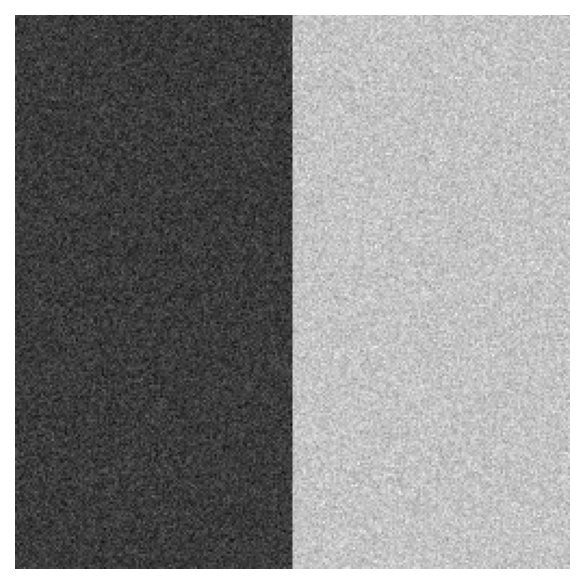

<Figure size 640x480 with 0 Axes>

In [ ]:
# IMAGE TEST
# Taille du tableau
N = 256

# Création du tableau avec des 0 partout
p0 = np.zeros((N, N))

# Mettre des 1 dans la moitié droite
p0[:, N//2:] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))

# Affichage
plt.figure(dpi=150)
plt.imshow(p1,cmap='gray')
plt.axis('off')
plt.show()

## FILTRE GAUSSIEN IMAGE TEST 1

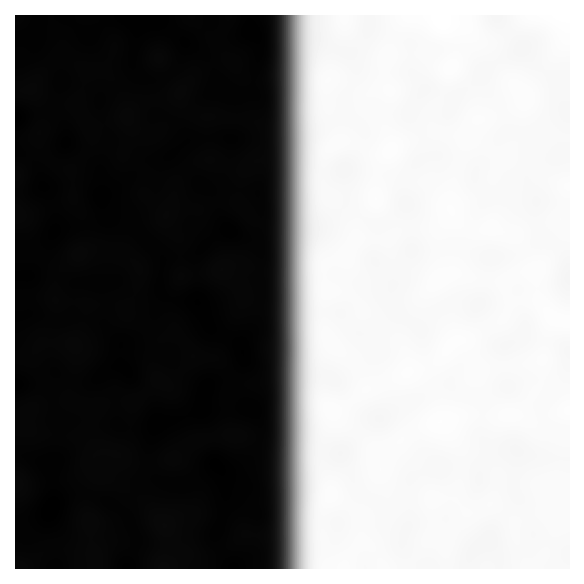

In [180]:
q1 = cv2.GaussianBlur(p1, (0,0), 5)

# Affichage
plt.figure(dpi=150)
plt.imshow(q1,cmap='gray')
plt.axis('off')
plt.show()

prof1 = np.mean(q1, axis=0)


## FILTRE BILATERAL IMAGE TEST 1

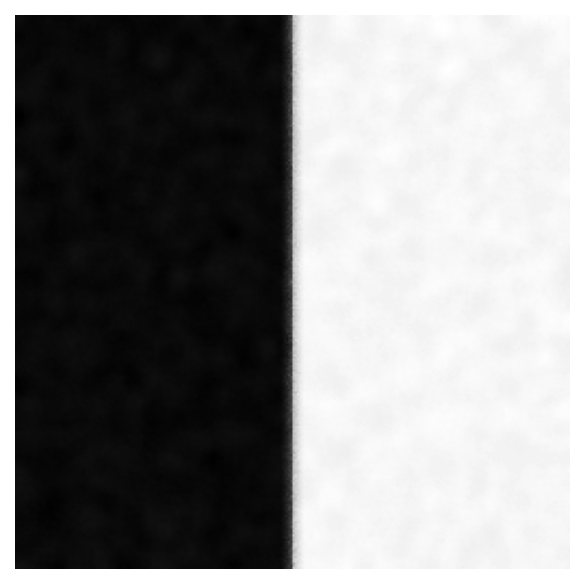

In [181]:
sigS = 6 # écart-type pour l'espace
sigR = 0.4 # écart-type pour la couleur
diam = 2 * sigS # diamètre de la fenêtre
p1 = p1.astype(np.float32)
q1 = cv2.bilateralFilter(p1, d=diam, sigmaSpace=sigS, sigmaColor=sigR)

# Affichage
plt.figure(dpi=150)
plt.imshow(q1,cmap='gray')
plt.axis('off')
plt.show()

prof2 = np.mean(q1, axis=0)

## FILTRE GUIDE IMAGE TEST 1

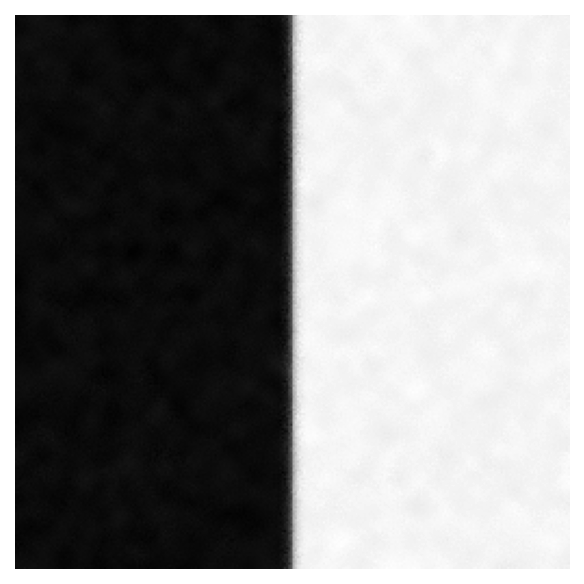

In [198]:
romega = 2 # rayon de la fenêtre
epsilon = 0.2 **2 # paramètre de régularisation
p14 = f.period_im(p1)
q14 = f.guided_f(p14,p14,romega,epsilon)
q1 = f.deperiod_im(q14)

# Affichage
plt.figure(dpi=150)
plt.imshow(q1,cmap='gray')
plt.axis('off')
plt.show()

## FILTRE GUIDE FAST IMAGE TEST 1

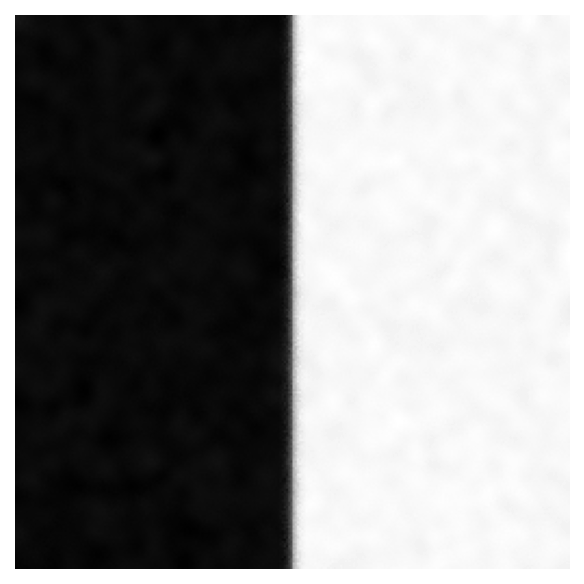

In [ ]:
romega = 2 # rayon de la fenêtre
epsilon = 0.2 **2 # paramètre de régularisation
q1 = f.guided_f_fast(p1,p1,romega,epsilon)

# Affichage
plt.figure(dpi=150)
plt.imshow(q1,cmap='gray')
plt.axis('off')
plt.show()

prof3 = np.mean(q1, axis=0)

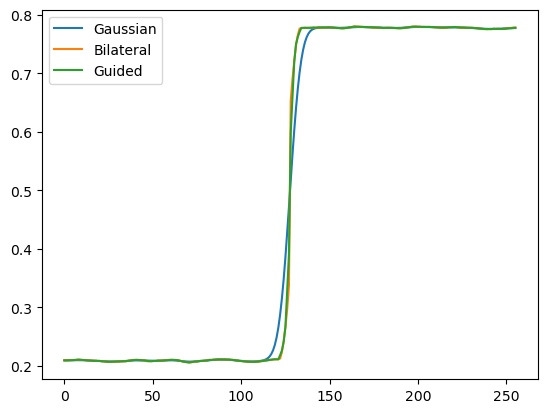

In [ ]:
plt.plot(prof1, label='Gaussian')
plt.plot(prof2, label='Bilateral')
plt.plot(prof3, label='Guided')
plt.legend()

## IMAGE REELLE 1

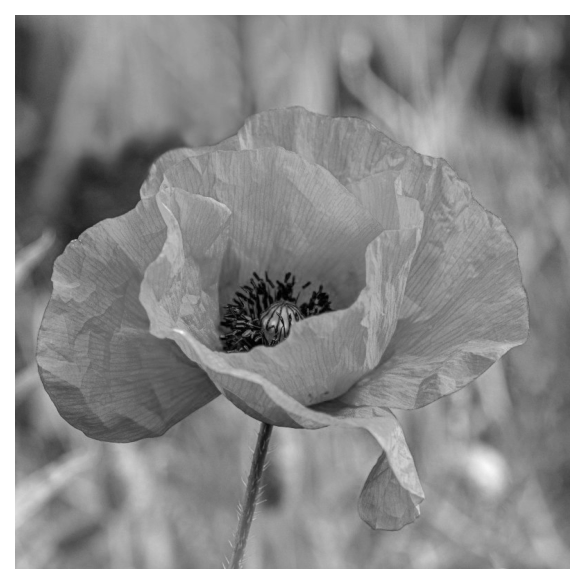

In [ ]:
# IMAGE REELLE
# Ouvrir l'image
p = plt.imread('coquelicot.jpg')
p = p-np.min(p)
p = p/np.max(p)
p2 = p.copy()

# Affichage
plt.figure(dpi=150)
plt.imshow(p2,cmap='gray')
plt.axis('off')
plt.show()


## FILTRE GAUSSIEN IMAGE REELLE 1

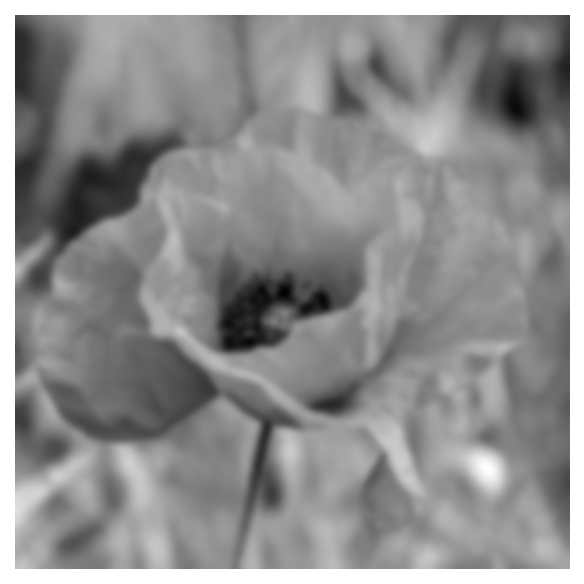

In [ ]:
q2 = cv2.GaussianBlur(p2, (0,0), 5)

# Affichage
plt.figure(dpi=150)
plt.imshow(q2,cmap='gray')
plt.axis('off')
plt.show()

## FILTRE BILATERAL IMAGE REELLE 1

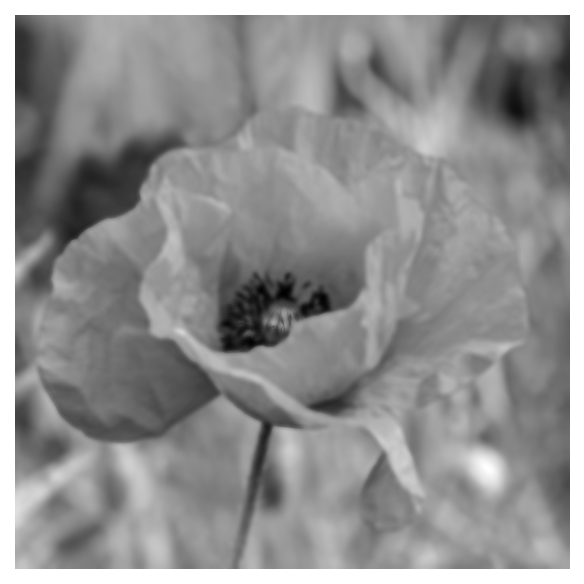

In [ ]:
sigS = 6 # écart-type pour l'espace
sigR = 0.4 # écart-type pour la couleur
diam = 2 * sigS # diamètre de la fenêtre
p2 = p2.astype(np.float32)
q2 = cv2.bilateralFilter(p2, d=diam, sigmaSpace=sigS, sigmaColor=sigR)

# Affichage
plt.figure(dpi=150)
plt.imshow(q2,cmap='gray')
plt.axis('off')
plt.show()

## FILTRE GUIDE IMAGE REELLE 1

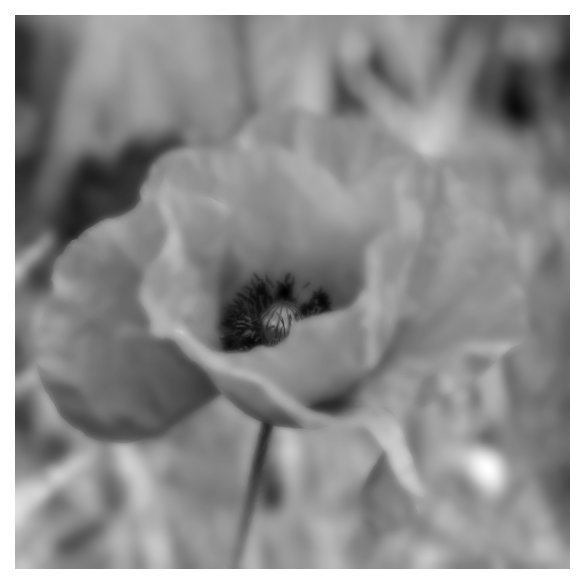

In [ ]:
romega = 4 # rayon de la fenêtre
epsilon = 0.2 **2 # paramètre de régularisation
p24 = f.period_im(p2)
q24 = f.guided_f(p24,p24,romega,epsilon)
q2 = f.deperiod_im(q24)

# Affichage
plt.figure(dpi=150)
plt.imshow(q2,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
romega = 2 # rayon de la fenêtre
epsilon = 0.2 **2 # paramètre de régularisation
q2 = f.guided_f_fast(p2,p2,romega,epsilon)

# Affichage
plt.figure(dpi=150)
plt.imshow(q2,cmap='gray')
plt.axis('off')
plt.show()